In [1]:
import torch
import torch.nn as nn
from torchtext import data
from torchtext.data import Field, RawField
import numpy as np
import json

from signjoey.data import load_data
from signjoey.model import build_model
from signjoey.helpers import load_config

2023-02-06 14:48:12.637799: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-06 14:48:12.637819: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-06 14:48:16.388160: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-06 14:48:16.388705: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-06 14:48:16.803946: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-06 14:48:16.803970: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pol): /proc/driver/nvidia/ve

In [2]:
cfg_file = r"./configs/prob2text/p1/tlp_prob.yaml"
cfg = load_config(cfg_file)

In [3]:
p_train_data, dev_data, test_data, gls_vocab, txt_vocab = load_data(
    data_cfg=cfg["data"],
    data_type="prob"
)

Using mBART vocabulary? False
loading ./data/probs/tlp_output_train.json
loading ./data/probs/tlp_output_dev.json
loading ./data/probs/tlp_output_test.json


In [19]:
i = iter(p_train_data.sgn)

In [25]:
next(i).shape

torch.Size([119, 1116])

In [16]:
p_train_data.fields

{'sequence': <torchtext.data.field.RawField at 0x7fa0c44a8580>,
 'signer': <torchtext.data.field.RawField at 0x7fa0c44a8790>,
 'sgn': <torchtext.data.field.Field at 0x7fa0c5d18f70>,
 'gls': <torchtext.data.field.Field at 0x7fa0c5d18af0>,
 'txt': <torchtext.data.field.Field at 0x7fa0c5d18fd0>}

In [5]:
next(train_data.sgn).shape

torch.Size([86, 1024])

In [5]:
model = build_model(
    cfg=cfg["model"],
    gls_vocab=gls_vocab,
    txt_vocab=txt_vocab,
    sgn_dim=sum(cfg["data"]["feature_size"])
    if isinstance(cfg["data"]["feature_size"], list)
    else cfg["data"]["feature_size"],
    do_recognition=False,
    do_translation=True,
)

Freezing transformer: False
 --------> Yeah, using super prob model!!!
Special tokens:
BOS = 2
PAD = 1
EOS = 3


# Sign data

In [3]:
cfg_file = r"./configs/sign2glosstext/s1/phoenix14t.yaml"
cfg = load_config(cfg_file)

train_data, dev_data, test_data, gls_vocab, txt_vocab = load_data(
    data_cfg=cfg["data"],
    data_type="sign"
)

Using mBART vocabulary? False


In [13]:
dev_data.fields

{'sequence': <torchtext.data.field.RawField at 0x7f300dceffd0>,
 'signer': <torchtext.data.field.RawField at 0x7f300dceff70>,
 'sgn': <torchtext.data.field.Field at 0x7f300dcefc40>,
 'gls': <torchtext.data.field.Field at 0x7f300d7d0a60>,
 'txt': <torchtext.data.field.Field at 0x7f300d7d07c0>}

In [55]:
signs = list(iter(train_data.sgn))

In [56]:
np.sqrt(1024)

32.0

In [57]:
for s in signs[:10]:
    print(s.shape)

torch.Size([86, 1024])
torch.Size([126, 1024])
torch.Size([168, 1024])
torch.Size([185, 1024])
torch.Size([71, 1024])
torch.Size([105, 1024])
torch.Size([168, 1024])
torch.Size([139, 1024])
torch.Size([87, 1024])
torch.Size([48, 1024])


In [58]:
max(s.shape[0] for s in signs)

395

In [59]:
min([torch.min(s) for s in signs]), max([torch.max(s) for s in signs])

(tensor(1.0000e-08), tensor(79.1501))

In [60]:
len(signs)

7095

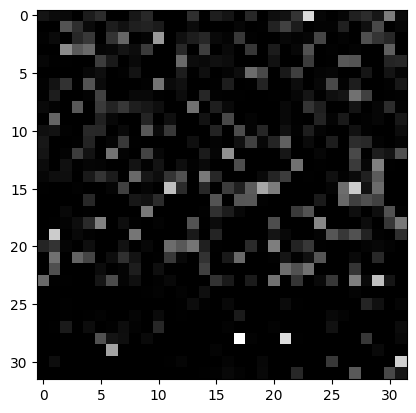

In [61]:
import matplotlib.pyplot as plt

sign = signs[123].numpy().reshape((-1,32,32))[12,:,:]
plt.imshow(sign, cmap="gray")